<div style="text-align: left;">
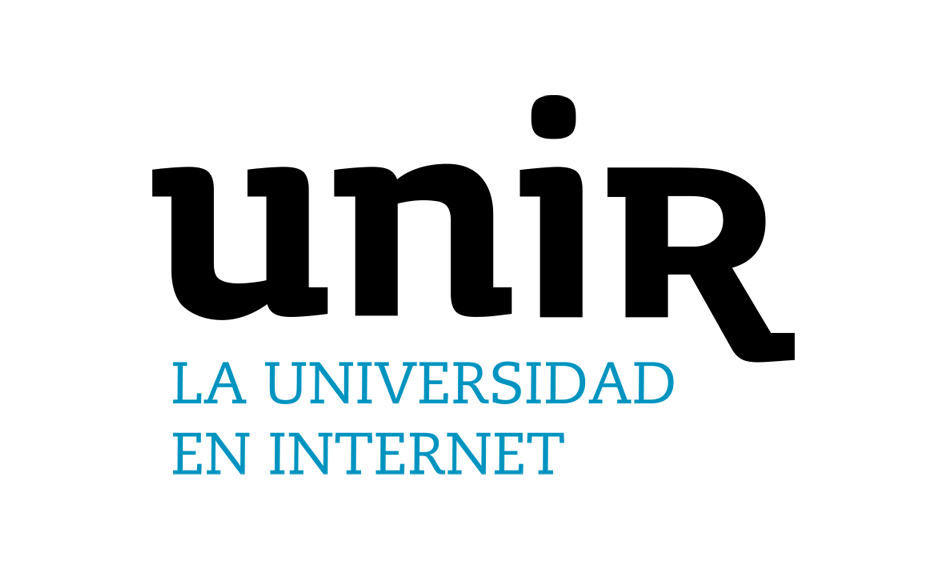
     <div>
        <h1>Actividad: Análisis de una estrategia <br> sintética con opciones</h1>
        <p>Autor: Gonzalo Miguel Gómez del Hierro</p>
        <p>Prof: Dr. Miguel Angel Navarro Burgos</p>
        <p>Máster Universitario en Ingeniería Matemática y Computación</p>
        <p>Modelización y Valoración de Derivados y Carteras en Finanzas</p>
    </div>
</div>

La estrategia que se va a estudiar en esta actividad consiste en tomar una posición larga tanto en una opción de venta (put), como en una de compra (call), sobre un mismo subyacente, mismo strike ($E$) y misma maturity ($T$) para ambas opciones. Como se compran ambas opciones, en un instante inicial el inversor habrá de abonar el precio (prima) de ambas. Esto es: $$CI = P + C,$$ donde $CI$ es una abreviatura para coste inicial, y $C$ y $P$ refieren a los precios de las opciones call y put respectivamente.

Siguiendo la notación de las diapositivas de clase, la función beneficio/pérdida (sin tener en cuenta el valor temporal del dinero) de ambas opciones es de la siguiente forma:
$$(B/P)_{CL}(S_T)= (S_T-E)^+-C$$
$$(B/P)_{PL}(S_T)= (E-S_T)^+-P$$
Y de manera agregada:
$$(B/P)_{TOTAL}(S_T)=|S_T-E|-(P+C)$$
Donde, en todos los casos, el beneficio/pérdida es una función del valor del subyacente en la fecha de vencimiento, $S_T\ge0$.

Atendiendo a la expresión del beneficio/pérdida agregado, se infiere que el inversor tendrá beneficios siempre y cuando el precio del subyacente y el strike se diferencien más que el coste inicial $CI$. Es decir, el inversor espera que el precio del subyacente se mueva "bastante", sin ningún sentido preponderante y sin tratarse de una estrategia alcista o bajista. La pérdida está acotada por $CI$, y se da en el caso en que $S_T=E$ (caso más opuesto a la intuición de que el precio se vaya a mover mucho, que no se mueva nada).

En el siguiente fragmento de código se define una función que toma como entrada una colección de valores posibles para el precio del subyacente y los valores $E$, $C$ y $P$, con el objetivo de graficar la función $(B/P)_{TOTAL}(S_T)$. Se añaden además los puntos de corte con el eje horizontal, como se pide en el enunciado.

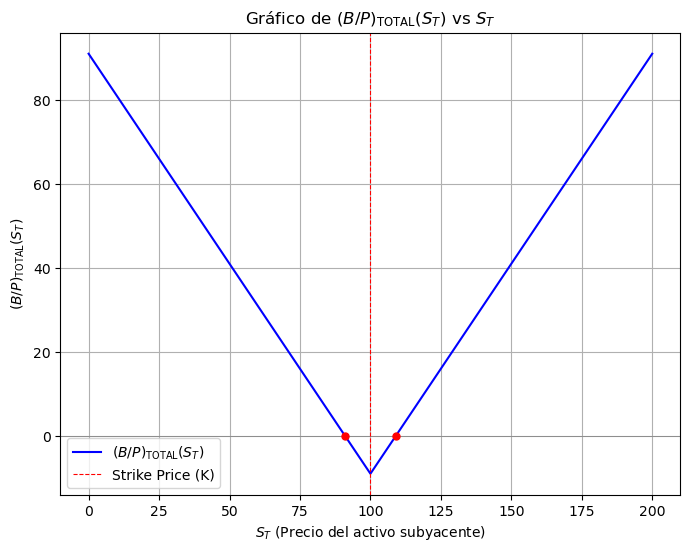

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función
def calcular_BP_call_total(S_T, E, C, P):
    return np.absolute(S_T - E) - (P + C)

# Parámetros
E = 100     # Precio de ejercicio (strike price)
C = 5      # Precio de la call
P = 4      # Precio de la put

# Rango de precios S_T
S_T_values = np.linspace(0, 200, 200)

# Añadimos el valor del strike para la representación y 
# los puntos de corte con el eje horizontal (donde abs(E-S_T)=P+C)
x1 = E + P + C
x2 = E - (P + C)
S_T_values = np.sort(np.concatenate((S_T_values,np.array([100,x1,x2]))))

# Calcular los valores de (B/P)_{TOTAL}(S_T) para cada S_T
BP_total_values = [calcular_BP_call_total(S_T, E, C, P) for S_T in S_T_values]

# Crear la gráfica_put_put
plt.figure(figsize=(8, 6))
plt.plot(S_T_values, BP_total_values, label=r'$(B/P)_{\text{TOTAL}}(S_T)$', color='b')
plt.axhline(0, color='gray', lw=0.5)  # Línea horizontal en 0
plt.axvline(E, color='red', linestyle='--', label='Strike Price (K)', lw=0.8)  # Línea vertical en K
plt.title(r'Gráfico de $(B/P)_{\text{TOTAL}}(S_T)$ vs $S_T$')
plt.xlabel(r'$S_T$ (Precio del activo subyacente)')
plt.ylabel(r'$(B/P)_{\text{TOTAL}}(S_T)$')
plt.legend()
plt.grid(True)
# Añadimos los puntos de corte con el eje horizontal
plt.plot(x1,0,marker='o', color='red', markersize=5)
plt.plot(x2,0,marker='o', color='red', markersize=5)
plt.show()

Por último, como se pide en el enunciado, se completa la tabla siguiente:

| Rango de precios de las acciones| Beneficio neto total |
|---------------------------------|----------------------|
| $0\le S\le 91$                  | $91-S \ge 0$               |
| $91<S<109$                      | $91-S\le 0\text{ si }91<S<100$ y $S-109 \le 0 \text{ si } 100<S<109$               |
| $S\ge 109$                      | $S-109 \ge 0$              |ell 9   |